<h1><center>Basic Bioinformatics Workflows on OSCAR : BioFlows</center></h1>
<p><center>Instructors: Ashok Ragavendran</center>
 <center>Center for Computation and Visualization</center>
 <center>Center for Computational Biology of Human Disease - Computational Biology Core</center></p>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Why-do-we-need-Pipelines?" data-toc-modified-id="Why-do-we-need-Pipelines?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Why do we need Pipelines?</a></span><ul class="toc-item"><li><span><a href="#Reproducibility" data-toc-modified-id="Reproducibility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reproducibility</a></span></li><li><span><a href="#Complicated-Data-Generation-Process" data-toc-modified-id="Complicated-Data-Generation-Process-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Complicated Data Generation Process</a></span></li><li><span><a href="#Complicated-Data-Conversion-Process" data-toc-modified-id="Complicated-Data-Conversion-Process-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Complicated Data Conversion Process</a></span></li><li><span><a href="#Key-Feature-of-NGS-Workflows" data-toc-modified-id="Key-Feature-of-NGS-Workflows-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Key Feature of NGS Workflows</a></span></li><li><span><a href="#Whats-out-there-?-..-A-Lot" data-toc-modified-id="Whats-out-there-?-..-A-Lot-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Whats out there ? .. A Lot</a></span></li><li><span><a href="#Why-is-it-necessary?" data-toc-modified-id="Why-is-it-necessary?-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Why is it necessary?</a></span></li></ul></li><li><span><a href="#BioFlows" data-toc-modified-id="BioFlows-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BioFlows</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#How-does-it-work" data-toc-modified-id="How-does-it-work-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>How does it work</a></span></li></ul></li><li><span><a href="#Let's-dive-into-it" data-toc-modified-id="Let's-dive-into-it-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Let's dive into it</a></span><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Screen-usage" data-toc-modified-id="Screen-usage-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Screen usage</a></span></li><li><span><a href="#Conda-Environment" data-toc-modified-id="Conda-Environment-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conda Environment</a></span></li><li><span><a href="#Sample-Manifest" data-toc-modified-id="Sample-Manifest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Sample Manifest</a></span></li><li><span><a href="#YAML-Control-File" data-toc-modified-id="YAML-Control-File-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>YAML Control File</a></span><ul class="toc-item"><li><span><a href="#Running-Fastqc" data-toc-modified-id="Running-Fastqc-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Running Fastqc</a></span></li><li><span><a href="#What-happened?" data-toc-modified-id="What-happened?-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>What happened?</a></span></li><li><span><a href="#What-next" data-toc-modified-id="What-next-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>What next</a></span></li></ul></li><li><span><a href="#What's-the-potential" data-toc-modified-id="What's-the-potential-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>What's the potential</a></span><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#Limitations" data-toc-modified-id="Limitations-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Limitations</a></span></li></ul></li></ul></li></ul></div>

## Why do we need Pipelines?
### Reproducibility

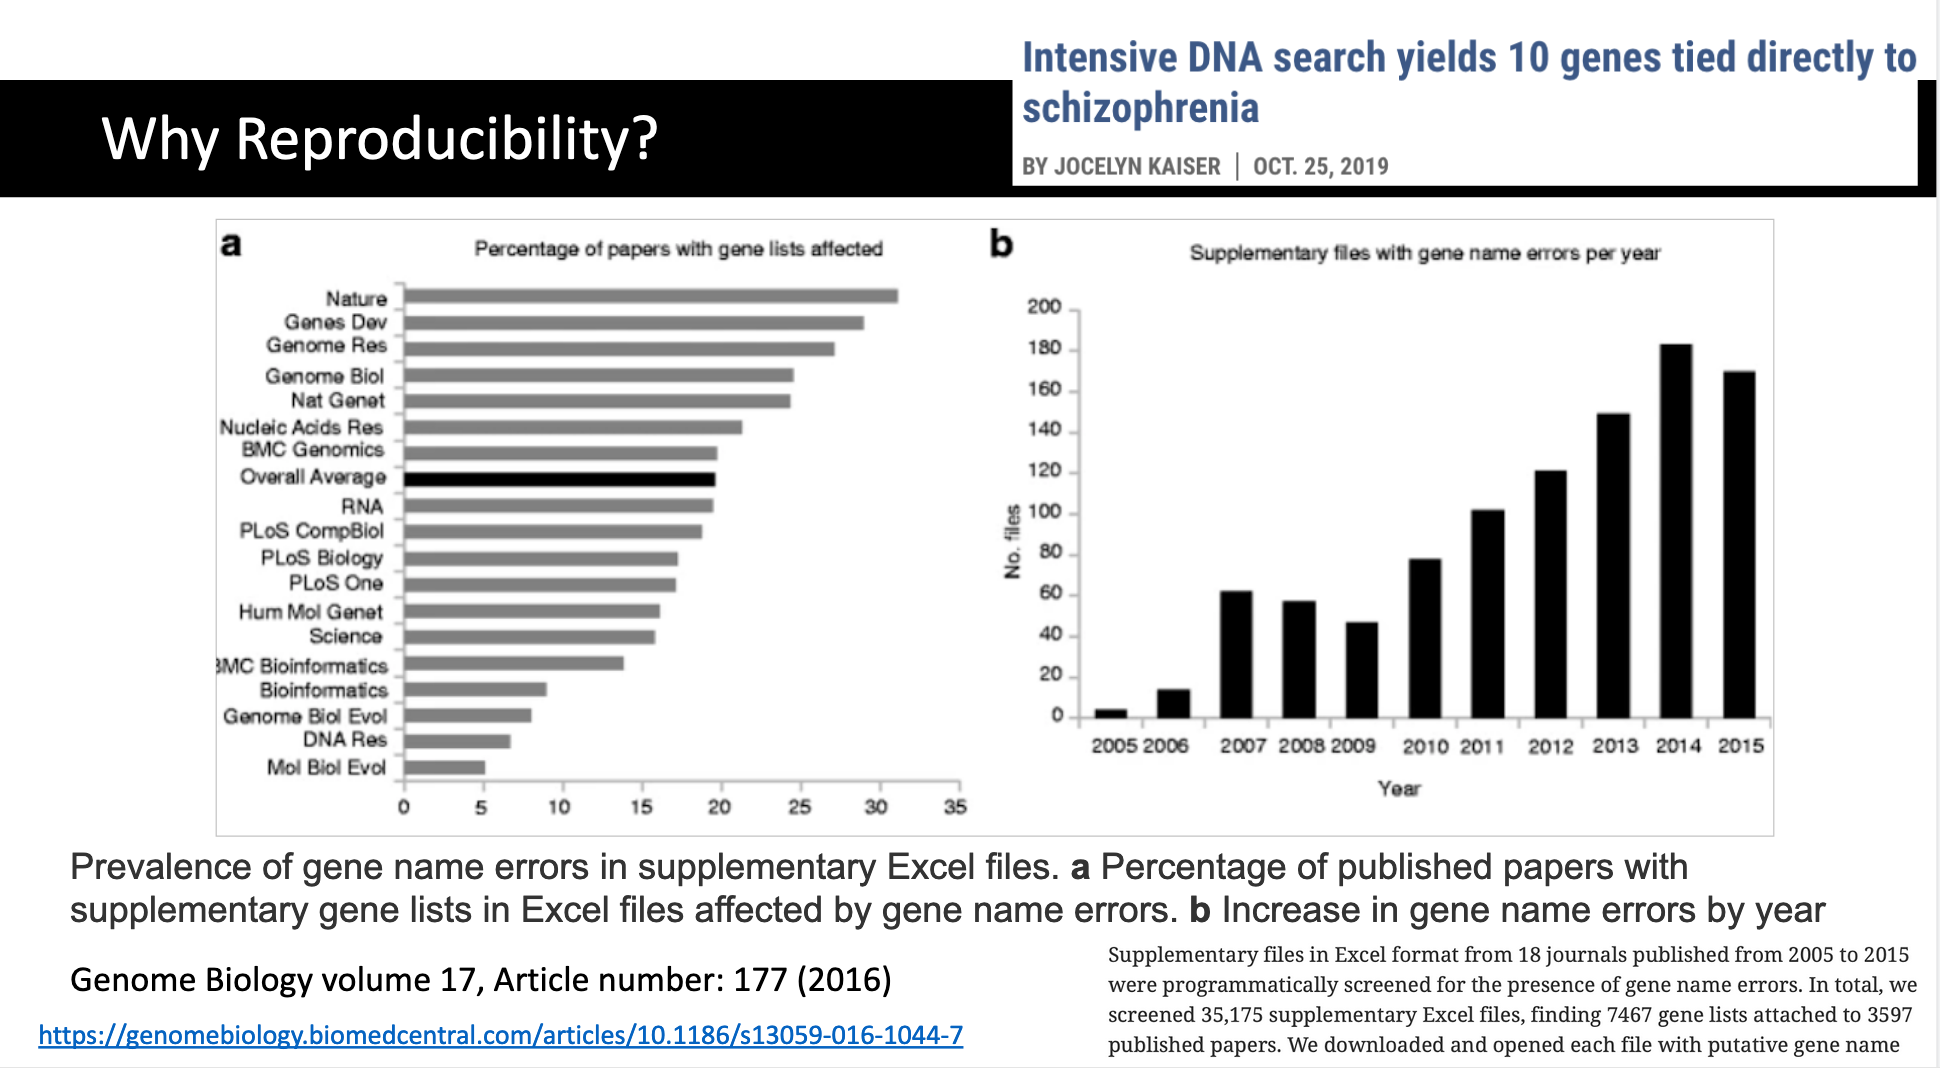

### Complicated Data Generation Process

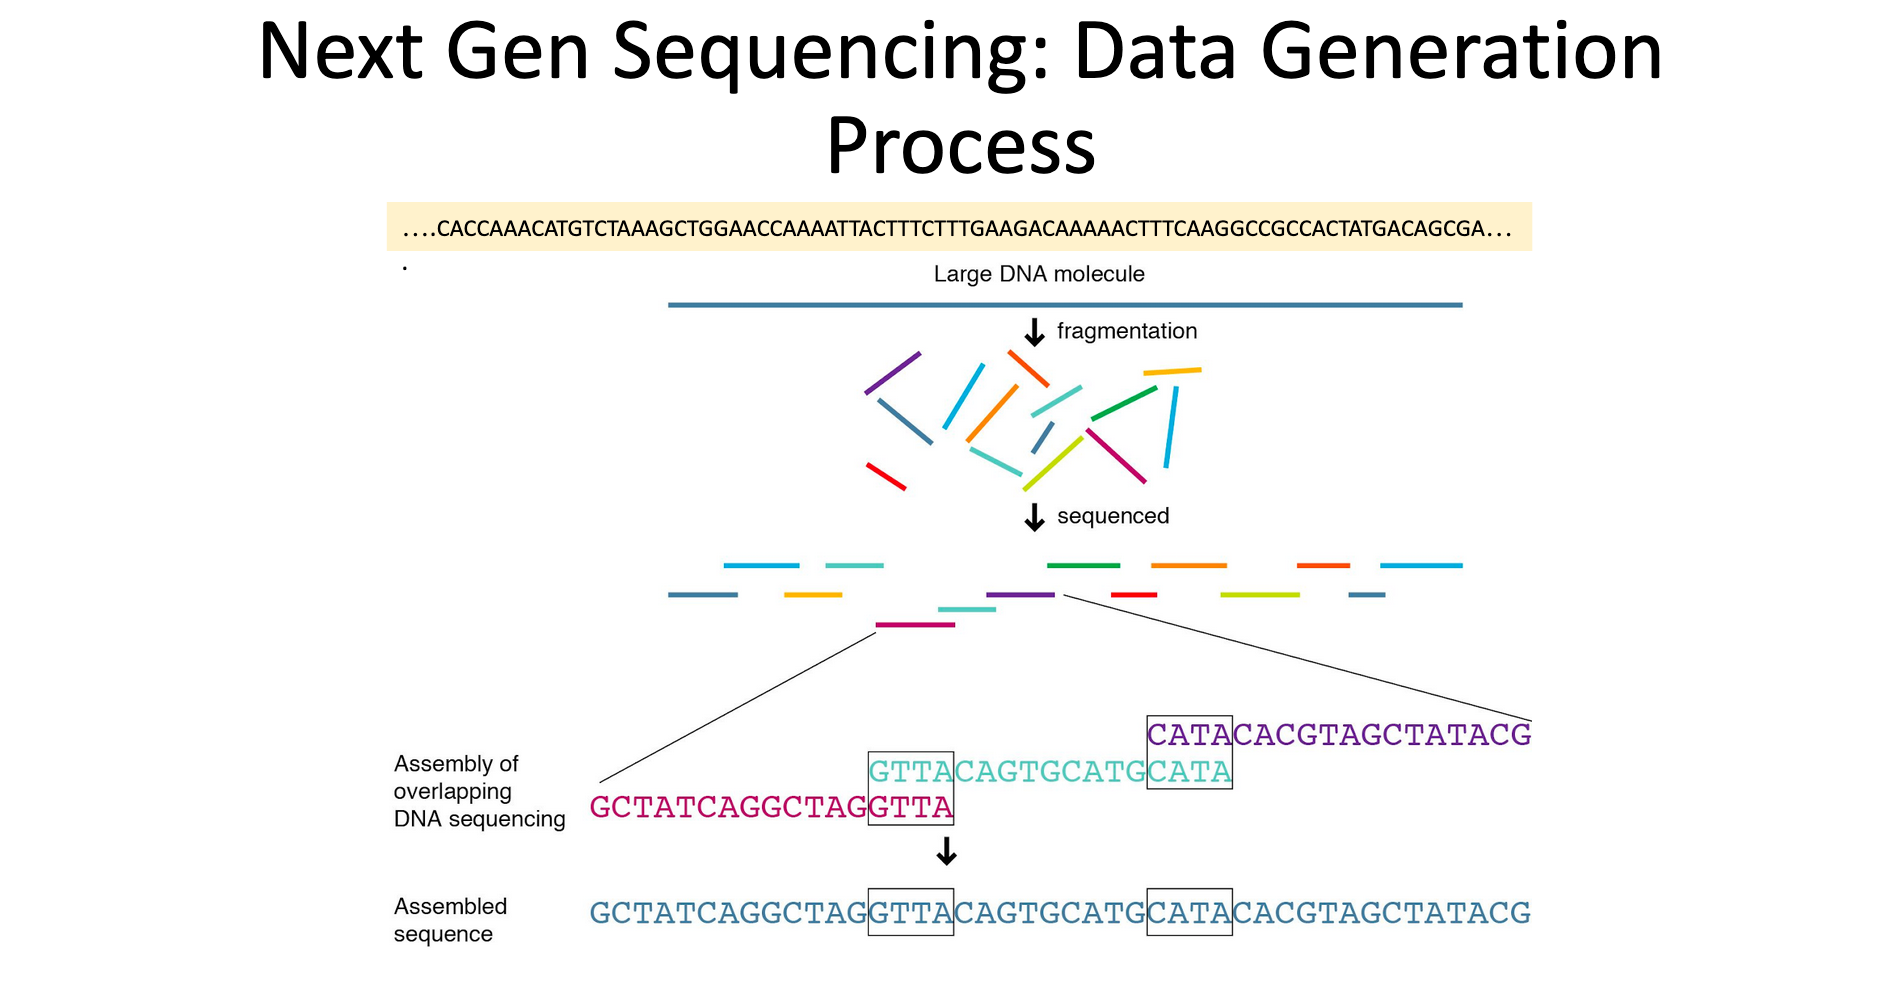

### Complicated Data Conversion Process

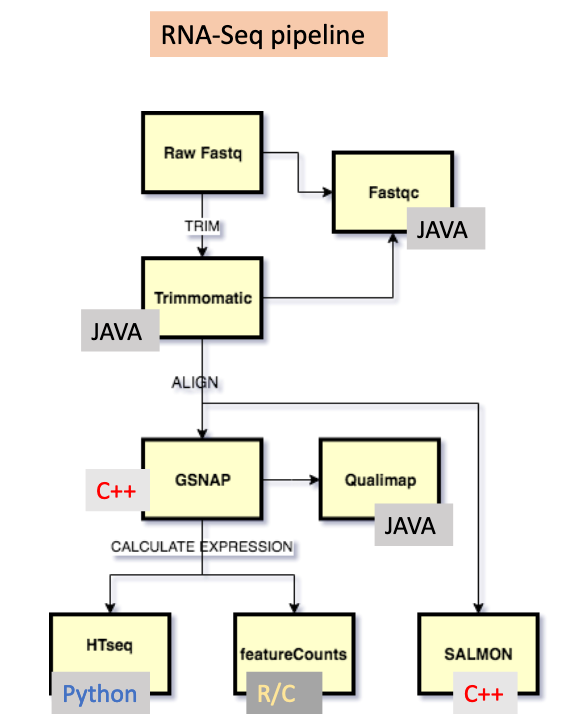

### Key Feature of NGS Workflows
- Sequential processing of files
- Usually requires more than one tool
- Multiple programming languages
- Most times each sample is processed individually
- Compute resource intensive
  - Alignment could take 16 cpus, 60 Gb RAM, 4-24 hours, 30Gb of disk space per sample


### Whats out there ? .. A Lot

In [2]:
from IPython.display import IFrame 
display(IFrame("https://github.com/pditommaso/awesome-pipeline#readme", width=800, height=300))

### Why is it necessary?
 As you have seen above there are quite a few steps even conceptually when running a standard workflow. These workflows include multiple calls to various programs. For example for one path in the Workflow diagram depicted above we have at least these steps
 1. Fastqc read1
 2. Fastqc read2
 3. Trimmomatic
 4. Fastqc read1
 5. Fastqc read2 
 6. GSNAP
 7. samtools ---> convert sam to bam
 8. samtools ---> sort bam
 9. samtools ---> create index for sorted bam
 10. Picard ---> Add Read Groups
 11. Mark Duplicates
 12. Qualimap QC alignments ---> May include multiple steps ( >3 ) depending on the tool you use
 13. HTseq count reads
 
 Now let's do some back of the envelope calculations for a single sample of Paired-end reads:
 |programs to be run     | 13 |
 |----|--|
 | Assuming at the minimum 2 log files  ( stdout and stderr)| 26 | 
 | output files to contend with | 13|
 | **Total files**|**39**|

## BioFlows
### Overview
- A program developed inhouse to run NGS bioinformatics pipelines
- Python based
<br></br>
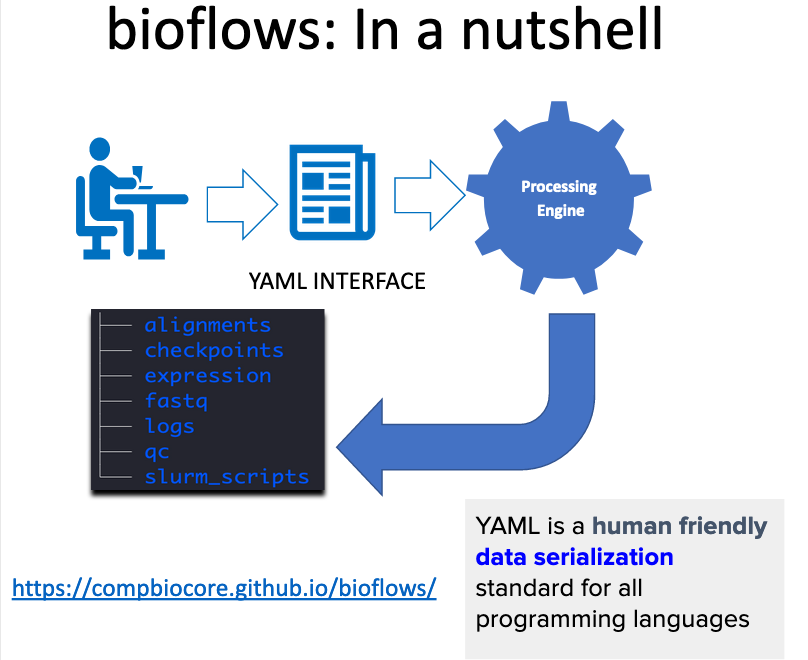

<br></br>
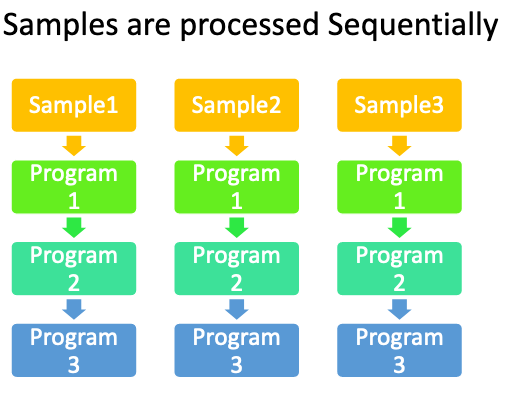

### How does it work
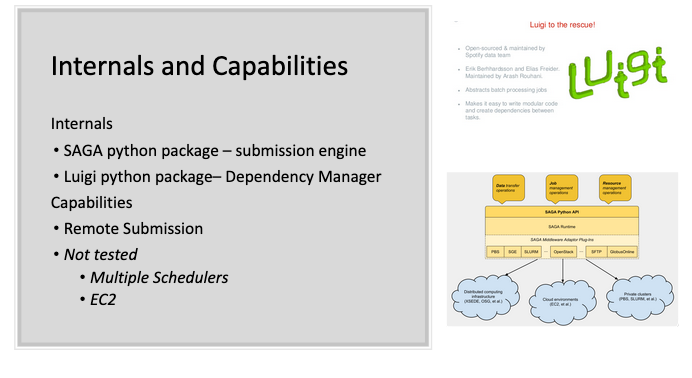

## Let's dive into it 

### Setup

Setup for BioFlows on OSCAR is pretty straightforward. You need to have on OSCAR
- **Linux screen**: This is available on most linux distros by default and you will need to know the basics of running it
- **Conda environment**: This is also provided on OSCAR with a conda environment specific to BioFlows
- **Storage space**: We will need sufficient space to ensure all the multiple outputs can be stored till the end of the workflow run 
- **Sample Manifest File**: A csv formatted sample manifest file with the columns `samplename, path to read1, path to read2`
- **YAML Control File**: A YAML format file that provides the details of the workflow

### Screen usage

BioFlows runs in a screen environment so that your session is not removed when you logout of your ssh session. Screen is basically a terminal multiplexer and you can learn more about it here. The primary commands you need to know are:
- `screen -S myscreenName`
- `screen -ls`
- `screen -r screen_id` or `screen -rd screen_id`
- `cntrl-a d`
- `cntrl-a c`
- `cntrl-a "`

<div class="alert alert-block alert-warning">
    <b>NOTE!!!</b><br></br> We will switch over to a terminal session here to practice
    </div>
           

### Conda Environment
The key feature of BioFlows, from a reproducibility perspective, is that it is available as a conda package from the CBC conda channel. So when you install BioFlows, you install all the accompanying programs that are used as a single conda package. We have already installed BioFlows on OSCAR in its own conda environment and it is available to use via the following command:
```
source /gpfs/runtime/cbc-conda/bin/activate_cbc_conda
```

### Sample Manifest
There are two types of Samples that can be processed bu BioFlows currently:
- A Sample manifest file in CSV format for your own samples. An example is given below for RNASeq data and we will use this example for a test launch of an RNASeq workflow

```

```
- You can provide an SRP or and SRR id to process samples from the NCBI SRA database

When you provide an SRP Id, the following happens
- Download the SRA file and convert to fastq using `sratools`. 
    - This also concatenates the various SRR run files into one single sample fastq file
    - Samples names are prefixed with the SRX and SRR ID
    - A metadata file is created which provides the Metadata regarding the SRA samnple

### YAML Control File

The key element to run workflows with BioFlows is the YAML control file and we will go over this in some detail. The YAML is a human readable data serialization standard - So it can be read in some manner, but it can also be processed in a standardized manner with some rules. 

This format has some specific requirements that I will go over now.
- Every level needs to be exactly 2 spaces in indentation
- There are `key:value` pairs and lists
- There is a hierachy to the file structure

This will become clear once we explore the example file below for RNAseq

```yaml
bioproject: WT_D3_Sol_rnaseq
experiment: WT_D3_3mo_sol_rnaseq
sample_manifest:
  fastq_file: test_sample_manifest_ar.csv
  metadata:
run_parms:
  conda_command: source /gpfs/runtime/cbc_conda/bin/activate_cbc_conda
  work_dir: /gpfs/scratch/aragaven/test_diego/run1
  log_dir: logs
  paired_end: True
  local_targets: False
  saga_host: localhost
  ssh_user: aragaven
  saga_scheduler: slurm
  gtf_file: /gpfs/scratch/aragaven/test_diego/Mus_musculus.GRCm38.97.gtf
workflow_sequence:
  - fastqc: default
  - trimmomatic:
      subcommand: PE
      options:
          "ILLUMINACLIP:/gpfs/data/cbc/cbc_conda_v1/envs/cbc_conda/opt/trimmomatic-0.36/adapters/TruSeq3-PE-2.fa:2:30:5:6:true":
          "SLIDINGWINDOW:10:25 MINLEN:75":
      job_params:
        ncpus: 16
        mem: 40000
        time: 300
  - fastqc:
      suffix:
        input: "_tr.fq.gz"
  - gsnap:
      suffix:
        input: "_tr.fq.gz"
      options:
        -d: Ensembl_mus_GRCm38.p5_rel89
        -s: /gpfs/runtime/cbc_conda/cbc_conda_v1_root/envs/cbc_conda_v1/gmapdb_2017.01.14/Ensembl_mus_GRCm38.p5_rel89/Ensembl_mus_GRCm38.p5_rel89.maps/Mus_musculus.GRCm38.89.splicesites.iit
      job_params:
        ncpus: 16
        mem: 40000
        time: 300
  - samtools:
      subcommand: view
      suffix:
        input: ".sam"
        output: ".bam"
      options:
        -Sbh:
      job_params:
        time: 300
  - samtools:
      subcommand: view
      suffix:
        input: ".bam"
        output: ".mapped.bam"
      options:
        -bh:
        -F: "0x4"
      job_params:
        time: 60
  - samtools:
      subcommand: view
      suffix:
        input: ".bam"
        output: ".unmapped.bam"
      options:
        -f: "0x4"
  - bamsort:
      suffix:
        input: ".mapped.bam"
        output: ".srtd.bam"
      options:
        inputthreads=4:
        outputthreads=4:
      job_params:
        ncpus: 16
        mem: 20000
        time: 300
  - samtools:
      subcommand: index
      suffix:
        input: ".srtd.bam"
      job_params:
        time: 200
  - bammarkduplicates2:
      suffix:
        input: ".srtd.bam"
        output: ".dup.srtd.bam"
      job_params:
        mem: 20000
        time: 300
        ncpus: 16
  - samtools:
      subcommand: index
      suffix:
        input: ".dup.srtd.bam"
      job_params:
        time: 200
  - qualimap:
      subcommand: rnaseq
  - htseq-count:
      job_params:
        mem: 20000
        time: 300
        ncpus: 16
  - featureCounts: default
  - fastq_screen:
      suffix:
        input: "_tr.fq.gz"
      options:
        --conf: /gpfs/data/cbc/Puni_vcf/run2/fastq_screen.conf
        --subset: 0
      job_params:
        ncpus: 4
        mem: 80000
        time: 1940
```

As you can see, it might appear there's quite a bit at first. So weill start with a simple start running only `Fastqc` and `trimmotatic` to process the raw reads.
#### Running Fastqc

As a first atep we will run fastqc and then run trimmomatic and then run fastqc on the trimmed reads. We will go over a few of the features in the YAML below


```yaml
bioproject: test_ccv_bootcamp_rnaseq
experiment: test_ccv_bootcamp_example_rnaseq
sample_manifest:
  fastq_file: /gpfs/scratch/aragaven/bioflows/test_data/sample_manifest_test.csv
  metadata:
run_parms:
  conda_command: source /gpfs/runtime/cbc_conda/bin/activate_cbc_conda
  work_dir: /gpfs/scratch/aragaven/bioflows/run1
  log_dir: logs
  paired_end: True
  local_targets: False
  saga_host: localhost
  ssh_user: aragaven
  saga_scheduler: slurm
  gtf_file: /gpfs/scratch/aragaven/bioflows/test_data/Mus_musculus.GRCm38.97.gtf
workflow_sequence:
  - fastqc: default
  - trimmomatic:
      subcommand: PE
      options:
          "ILLUMINACLIP:/gpfs/data/cbc/cbc_conda_v1/envs/cbc_conda/opt/trimmomatic-0.36/adapters/TruSeq3-PE-2.fa:2:30:5:6:true":
          "SLIDINGWINDOW:10:25 MINLEN:75":
      job_params:
        ncpus: 16
        mem: 40000
        time: 300
  - fastqc:
      suffix:
        input: "_tr.fq.gz"
```

<div class="alert alert-block alert-warning">
    <b>NOTE:</b> Let's run the above
    </div>

#### What happened?
First let's look into our working directory and we see that the following directory tree has been created

```
run1
├── alignments 
├── checkpoints
├── fastq
├── logs
├── qc
└── slurm_scripts
```

- ***alignments***:  This contains all the sam and bam files
- ***checkpoints***: A directory that contains checkpoint files letting the program know a particular program was done
- ***fastq***: Contains symbolic links to the original raw fastq
- ***logs***: Contains all the logs
- ***qc***: Contains any QC based output 
- ***slurm_scripts***: Contains Slurm scripts for the actual commands submitted

We will go over each of these in the terminal
<div class="alert alert-block alert-warning">
    <b>NOTE:</b> Let's switch to the terminal
    </div>

#### What next
We can add the next program step to our YAML and continue down the pipeline or we can add it all and **hope it runs to completion**. Either way, we will need to troubleshoot issues that may arise along the way

### What's the potential

#### Features
So there are some features that we will not be able to show here.
- Download and Process from SRA
  - <div class="alert alert-block alert-warning"> 
  <b>NOTE:</b> Lets look into an example here /gpfs/scratch/aragaven/bioflows/sra_example </div>
- You can run a program multiple times or mix and match your pipelines to a certain degree
- Options for the program are the same as the options you provide in the YAML
- You can rerun a step by 
    - removing the checkpoints and moving the program to the end of the YAML
    - Using the Slurm Scripts provided
- Slurm scripts and commands are provided
    - You are not wedded to the package
    - Provides an opportunity to learn to run the commands idenpendently
- We have added the following programs thus far and you can get pretty far with them
    - Read processing
        - Fastqc
        - Fastq Screen
        - Trimmomatic
    - Alignment
        - BWA
        - GSNAP
    - Post Alignment
        - Samtools
        - PicardTools
            - AddReadGroups
            - Gc Content
            - Mark Duplicates
        - GATK  - Whole Exome Sequencing Variant calling 
        - HTseq
        - Feature Counts
     - QIIME2

#### Limitations

Some of the Drawbacks  are 
- None!!! Just kidding :)
- Development can lag sometimes - we are working on improving that
- It's a rapidly changing environment - New tools and New approaches
 - We are refactoring our code to make adding additional tools easier
- Other alternatives out there eg., SnakeMake and NextFlow - How do we leverage? Not re-invent the wheel

 <center>**ITS A WORK IN PROGRESS !!!!**</center>